# Classification

### Setup

In [5]:
import sys
assert sys.version_info >= (3,5)

IS_COLAB = 'google.colab' in sys.modules
IS_KAGGLE = 'kaggle_secrets' in sys.modules

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#where to

In [9]:
from sklearn.datasets import load_digits

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print("keys:", mnist.keys())

'''
mnist = load_digits()
type(mnist)
mnist.keys()
'''

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


'\nmnist = load_digits()\ntype(mnist)\nmnist.keys()\n'

In [7]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [10]:
for k in mnist.keys():
    print("####")
    print(k)
    print(mnist[k])

####
data
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
####
target
['5' '0' '4' ... '4' '5' '6']
####
frame
None
####
categories
{}
####
feature_names
['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68'

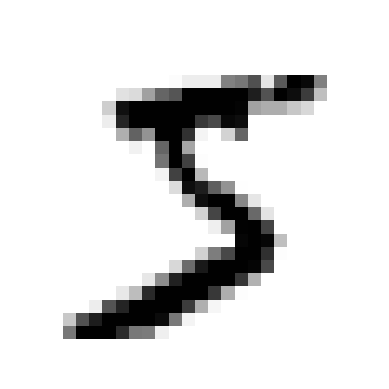

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt


def show_images(images, titles=None):
    n_images = len(images)
    if titles is None:
        titles = ["image %d" % i for i in range(1, n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(n_images, n_images, n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image.reshape(28, 28), cmap = "binary", interpolation='nearest')
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary", interpolation='nearest')
plt.axis("off")
plt.show()

In [37]:
y[0]

'5'

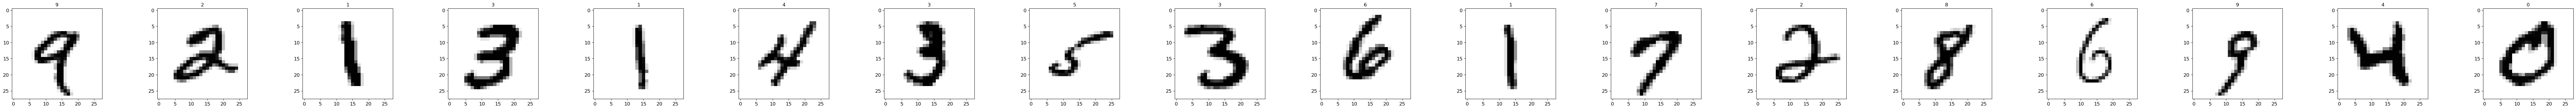

In [38]:
show_images(X[4:22], titles=y[4:22])

# Setting train and testing, data and label arrays

In [40]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

let's simply the problem and only try to identify 5

In [41]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [42]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [43]:
type(y_train_5)

numpy.ndarray

### what is gradient descent?

### What is Stochastic gradient descent


In [45]:
import sklearn.linear_model


sgd_clf = sklearn.linear_model.SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [46]:
sgd_clf.predict([some_digit])

array([ True])